In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
#导入torchaudio等相关包
import torch
import torchaudio
import soundfile
import matplotlib.pyplot as plt
from torchaudio import transforms

torchaudio.set_audio_backend("soundfile")

波形形状:torch.Size([2, 8935836])
波形采样率:44100


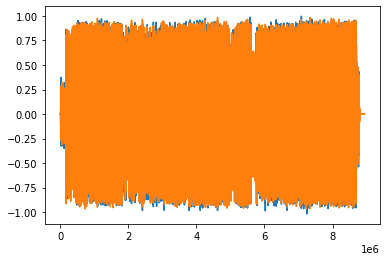

In [3]:
#加载声音文件，原始音频信号
filename = "D:\\动手学PyTorch深度学习建模与应用\\ch08\\恭喜发财.mp3"
waveform,sample_rate = torchaudio.load(filename)
print("波形形状:{}".format(waveform.size()))
print("波形采样率:{}".format(sample_rate))
plt.figure()
plt.plot(waveform.t().numpy())
plt.show()

频谱图形状:torch.Size([2, 201, 44680])


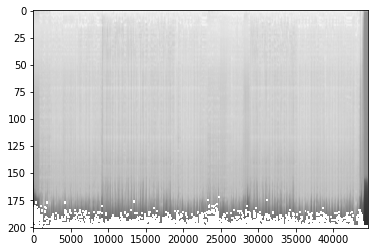

In [4]:
import torchaudio
#对数刻度查看频谱图
specgram = torchaudio.transforms.Spectrogram()(waveform)
print("频谱图形状:{}".format(specgram.size()))
plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(),cmap='gray',aspect="auto")
plt.show()

C:\Users\Wren\envs\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


梅尔频谱图形状:torch.Size([2, 128, 44680])


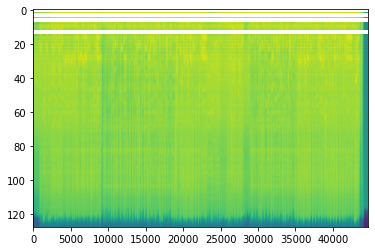

In [5]:
#对数刻度查看梅尔光谱图
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("梅尔频谱图形状:{}".format(specgram.size()))
plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(),cmap='viridis',aspect="auto")
plt.show()

变换后波形形状:torch.Size([1, 595723])


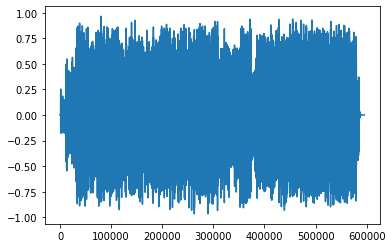

In [6]:
#重新采样波形
new_sample_rate = sample_rate/15
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate,new_sample_rate)(waveform[channel,:].view(1,-1))
print("变换后波形形状:{}".format(transformed.size()))
plt.figure()
plt.plot(transformed[0,:].numpy())
plt.show()

In [7]:
#查看波形区间
print("波形最小值:{}\n波形最大值:{}\n波形平均值:{}".format(waveform.min(),waveform.max(),waveform.mean()))

波形最小值:-1.0179462432861328
波形最大值:0.9967185854911804
波形平均值:-1.855347363743931e-05


In [8]:
#波形的归一化
def normalize(tensor):
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

waveform_ = normalize(waveform)

In [9]:
#再次查看波形区间
print("波形最小值:{}\n波形最大值:{}\n波形平均值:{}".format(waveform_.min(),waveform_.max(),waveform_.mean()))

波形最小值:-1.0
波形最大值:0.9791826605796814
波形平均值:1.4015085758600776e-09


变换后波形形状: torch.Size([2, 8935836])


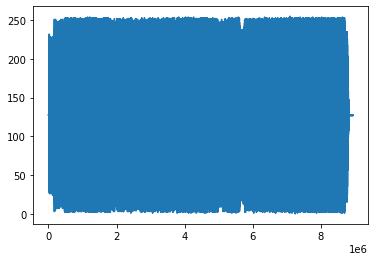

In [10]:
#新波形Mu-Law编码
transformed = torchaudio.transforms.MuLawEncoding()(waveform_)
print("变换后波形形状: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())
plt.show()

新波形形状: torch.Size([2, 8935836])


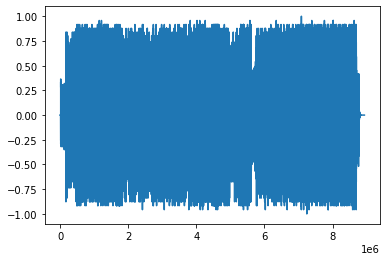

In [11]:
#对新波形解码
reconstructed = torchaudio.transforms.MuLawDecoding()(transformed)
print("新波形形状: {}".format(reconstructed.size()))

plt.figure()
plt.plot(reconstructed[0,:].numpy())
plt.show()

In [12]:
#比较原始波形与新波形
err = ((waveform-reconstructed).abs() / waveform.abs()).mean()
print("原始信号和重构信号之间的差异: {:.2%}".format(err))

原始信号和重构信号之间的差异: 41.18%


In [13]:
#动手练习：音频相似度分析

In [14]:
#导入torchaudio等相关包
import torch
import torchaudio
import soundfile
import matplotlib.pyplot as plt

torchaudio.set_audio_backend("soundfile")

Shape of waveform:torch.Size([2, 22601250])
sample rate of waveform:44100


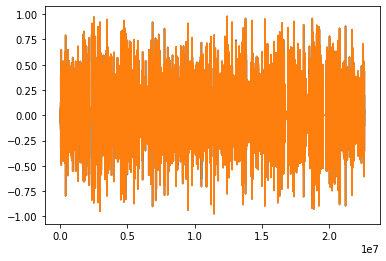

In [15]:
filename1 = "教程1.wav"
waveform1,sample_rate1 = torchaudio.load(filename1)
print("Shape of waveform:{}".format(waveform1.size())) #音频大小
print("sample rate of waveform:{}".format(sample_rate1))#采样率
plt.figure()
plt.plot(waveform1.t().numpy())
plt.show()

Shape of waveform:torch.Size([2, 22601250])
sample rate of waveform:44100


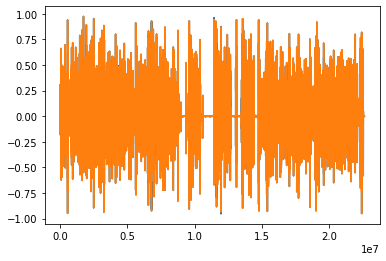

In [16]:
filename2 = "教程2.wav"
waveform2,sample_rate2 = torchaudio.load(filename2)
print("Shape of waveform:{}".format(waveform2.size())) #音频大小

print("sample rate of waveform:{}".format(sample_rate2))#采样率
plt.figure()
plt.plot(waveform2.t().numpy())
plt.show()

In [17]:
similarity = torch.cosine_similarity(waveform1, waveform2, dim=0)
print('similarity', similarity)

similarity tensor([0.0000, 0.0000, 0.0000,  ..., 0.9701, 1.0000, 0.9487])


In [18]:
similarity.mean()

tensor(-8.0169e-05)

In [19]:
similarity.median()

tensor(0.)

In [20]:
import torch
import torchaudio
import soundfile
import matplotlib.pyplot as plt

torchaudio.set_audio_backend("soundfile")

filename1 = "教程1.wav"
filename2 = "教程2.wav"
waveform1,sample_rate1 = torchaudio.load(filename1)
waveform2,sample_rate2 = torchaudio.load(filename2)

similarity = torch.cosine_similarity(waveform1, waveform2, dim=0)
similarity.mean()

tensor(-8.0169e-05)